In [ ]:
import numpy as np
import pandas as pd
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from tqdm import tqdm  # for progress bar

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Junior Spring 2024/CDS DS 340/FinalProject/styles.csv',
                  on_bad_lines='skip',usecols = ['id', 'gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'usage'])
data.dropna()
data.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,usage
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,Casual
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,Casual
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,Casual
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,Casual
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,Casual


In [ ]:
import pandas as pd
from PIL import Image
import numpy as np
import os
import zipfile
from google.colab import drive

drive.mount("/content/drive", force_remount=True)

# Specify the zip file location
zip_path = '/content/drive/My Drive/Junior Spring 2024/CDS DS 340/FinalProject/image_data/images.zip'

# Specify a local directory in Colab VM to extract the files
local_extract_path = '/content/extracted_images'

# Unzip the file locally in the Colab VM
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(local_extract_path)

# Setup variables for image processing
images_dir = os.path.join(local_extract_path, 'images')
desired_size = (64, 64)
image_data = []

# Process the images
for filename in os.listdir(images_dir):
    if len(image_data) >= 10000:
        break
    image_path = os.path.join(images_dir, filename)
    base_filename = os.path.splitext(filename)[0]
    product_id = ''.join(filter(str.isdigit, base_filename))

    if os.path.exists(image_path):
        with Image.open(image_path) as img:
            if img.mode != 'RGB':
                img = img.convert('RGB')
            img_resized = img.resize(desired_size)
            image_data.append([product_id, np.array(img_resized)])
    else:
        print(f"Image not found for product_id {product_id} at {image_path}")

# Create DataFrame
df = pd.DataFrame(image_data, columns=['product_id', 'image_array'])

print("DataFrame creation complete. Sample data:")
print(df.head())


Mounted at /content/drive
DataFrame creation complete. Sample data:
  product_id                                        image_array
0      42309  [[[255, 255, 255], [255, 255, 255], [255, 255,...
1      37971  [[[255, 255, 255], [255, 255, 255], [255, 255,...
2      23125  [[[255, 255, 255], [255, 255, 255], [255, 255,...
3      44816  [[[255, 255, 255], [255, 255, 255], [255, 255,...
4       3524  [[[255, 255, 255], [255, 255, 255], [255, 255,...


In [ ]:
df['image_array'] = df['image_array'] / 255
df.head()
df['product_id'] = df['product_id'].astype(int)

data.rename(columns={'id': 'product_id'}, inplace=True)
full_data = pd.merge(df, data, on='product_id', how='inner')
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_id      10000 non-null  int64 
 1   image_array     10000 non-null  object
 2   gender          10000 non-null  object
 3   masterCategory  10000 non-null  object
 4   subCategory     10000 non-null  object
 5   articleType     10000 non-null  object
 6   baseColour      9995 non-null   object
 7   season          9998 non-null   object
 8   usage           9928 non-null   object
dtypes: int64(1), object(8)
memory usage: 703.2+ KB


In [ ]:
example_row = full_data.iloc[0]
print("Example row:")
print(example_row)

Example row:
product_id                                                            42309
image_array               [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...
gender                                                                Women
masterCategory                                                      Apparel
subCategory                                                           Saree
articleType                                                          Sarees
baseColour                                                             Grey
season                                                               Summer
usage                                                                Ethnic
gender_encoded                                                            4
masterCategory_encoded                                                    1
subCategory_encoded                                                      25
articleType_encoded                                                      90

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming test_data is your existing DataFrame with the following columns
columns_to_encode = ['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'usage']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each column and apply LabelEncoder to transform the data
for column in columns_to_encode:
    # Create a new column in test_data for the encoded data
    full_data[f'{column}_encoded'] = label_encoder.fit_transform(full_data[column])

# Display the modified DataFrame
print(full_data.head())


   product_id                                        image_array gender  \
0       42309  [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...  Women   
1       37971  [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...  Women   
2       23125  [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...    Men   
3       44816  [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...  Women   
4        3524  [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...    Men   

  masterCategory subCategory articleType baseColour  season   usage  \
0        Apparel       Saree      Sarees       Grey  Summer  Ethnic   
1       Footwear       Shoes       Heels        Red    Fall  Casual   
2       Footwear  Flip Flops  Flip Flops        Red  Summer  Casual   
3        Apparel  Bottomwear       Jeans       Blue  Summer  Casual   
4        Apparel     Topwear     Tshirts      Black  Summer  Casual   

   gender_encoded  masterCategory_encoded  subCategory_encoded  \
0               4                       1               

In [ ]:
def resize_images(image_arrays, size=(64, 64)):
    resized_images = []
    for img_array in image_arrays:
        img = Image.fromarray(np.uint8(img_array * 255))  # Convert from [0,1] to [0,255] and to uint8
        img_resized = img.resize(size)
        resized_images.append(np.array(img_resized) / 255.0)  # Normalize back to [0,1]
    return np.array(resized_images)


Epoch 1/10
235/235 [==============================] - 158s 659ms/step - loss: 0.8080 - accuracy: 0.6671 - val_loss: 0.6005 - val_accuracy: 0.7844
Epoch 2/10
235/235 [==============================] - 148s 630ms/step - loss: 0.5934 - accuracy: 0.7776 - val_loss: 0.5908 - val_accuracy: 0.7812
Epoch 3/10
235/235 [==============================] - 166s 709ms/step - loss: 0.4993 - accuracy: 0.8091 - val_loss: 0.4700 - val_accuracy: 0.8276
Epoch 4/10
235/235 [==============================] - 147s 623ms/step - loss: 0.4456 - accuracy: 0.8359 - val_loss: 0.4649 - val_accuracy: 0.8348
Epoch 5/10
235/235 [==============================] - 149s 636ms/step - loss: 0.3951 - accuracy: 0.8552 - val_loss: 0.4323 - val_accuracy: 0.8356
Epoch 6/10
235/235 [==============================] - 160s 682ms/step - loss: 0.3611 - accuracy: 0.8660 - val_loss: 0.4325 - val_accuracy: 0.8384
Epoch 7/10
235/235 [==============================] - 148s 630ms/step - loss: 0.3286 - accuracy: 0.8763 - val_loss: 0.4343 -

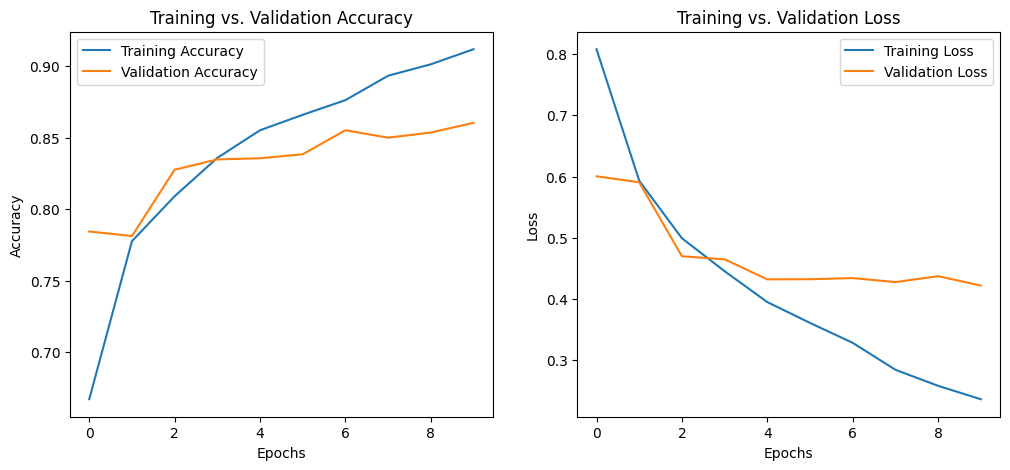

In [ ]:
from tensorflow.keras.utils import to_categorical

labels_gender = full_data['gender_encoded'].values
value_counts_gender = full_data['gender'].nunique()
resized_images = resize_images(full_data['image_array'].values)

model1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(value_counts_gender, activation='softmax')
])
model1.compile(optimizer ='adam', loss ='categorical_crossentropy', metrics = ['accuracy'])
x_train, x_test, y_train, y_test = train_test_split(resized_images, labels_gender, test_size=0.25, random_state=42)

y_train_encoded = to_categorical(y_train, num_classes=value_counts_gender)
y_test_encoded = to_categorical(y_test, num_classes=value_counts_gender)


history = model1.fit(x_train, y_train_encoded, epochs = 10, batch_size = 32, validation_data=(x_test, y_test_encoded))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


Epoch 1/10
235/235 [==============================] - 519s 2s/step - loss: 0.9404 - accuracy: 0.6259 - val_loss: 0.4659 - val_accuracy: 0.8220
Epoch 2/10
235/235 [==============================] - 557s 2s/step - loss: 0.3266 - accuracy: 0.8904 - val_loss: 0.2671 - val_accuracy: 0.9160
Epoch 3/10
235/235 [==============================] - 542s 2s/step - loss: 0.2259 - accuracy: 0.9292 - val_loss: 0.1941 - val_accuracy: 0.9372
Epoch 4/10
235/235 [==============================] - 550s 2s/step - loss: 0.2024 - accuracy: 0.9380 - val_loss: 0.2525 - val_accuracy: 0.9200
Epoch 5/10
235/235 [==============================] - 522s 2s/step - loss: 0.1489 - accuracy: 0.9569 - val_loss: 0.1430 - val_accuracy: 0.9588
Epoch 6/10
235/235 [==============================] - 568s 2s/step - loss: 0.1270 - accuracy: 0.9585 - val_loss: 0.1372 - val_accuracy: 0.9612
Epoch 7/10
235/235 [==============================] - 566s 2s/step - loss: 0.1129 - accuracy: 0.9671 - val_loss: 0.1854 - val_accuracy: 0.9516

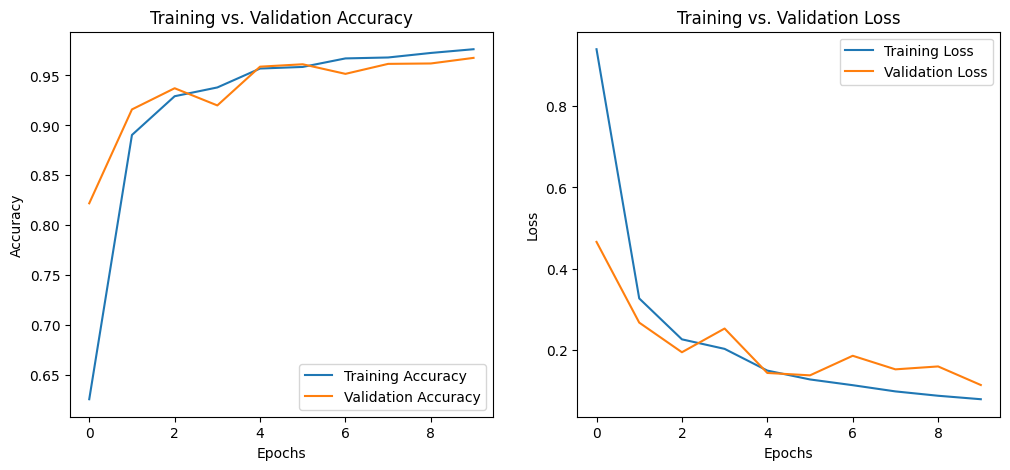

In [ ]:
###Training the model to predict Mastercategories
value_counts_cat = full_data['masterCategory'].nunique()
labels_cat = full_data['masterCategory_encoded'].values

model2 = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.3),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(value_counts_cat, activation='softmax')
])


model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

x_train, x_test, y_train, y_test = train_test_split(resized_images, labels_cat, test_size=0.25, random_state=42)
y_train_encoded = to_categorical(y_train, num_classes=value_counts_cat)
y_test_encoded = to_categorical(y_test, num_classes=value_counts_cat)

history = model2.fit(x_train, y_train_encoded, epochs = 10, batch_size = 32, validation_data=(x_test, y_test_encoded))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


Epoch 1/10
235/235 [==============================] - 450s 2s/step - loss: 2.7105 - accuracy: 0.3880 - val_loss: 1.6709 - val_accuracy: 0.5492
Epoch 2/10
235/235 [==============================] - 446s 2s/step - loss: 1.7170 - accuracy: 0.5907 - val_loss: 1.2573 - val_accuracy: 0.7044
Epoch 3/10
235/235 [==============================] - 444s 2s/step - loss: 1.4909 - accuracy: 0.6593 - val_loss: 1.0992 - val_accuracy: 0.7468
Epoch 4/10
235/235 [==============================] - 446s 2s/step - loss: 1.2587 - accuracy: 0.7212 - val_loss: 0.9840 - val_accuracy: 0.7712
Epoch 5/10
235/235 [==============================] - 454s 2s/step - loss: 1.1668 - accuracy: 0.7379 - val_loss: 0.9452 - val_accuracy: 0.7920
Epoch 6/10
235/235 [==============================] - 451s 2s/step - loss: 1.1059 - accuracy: 0.7569 - val_loss: 0.8824 - val_accuracy: 0.8224
Epoch 7/10
235/235 [==============================] - 444s 2s/step - loss: 1.0689 - accuracy: 0.7640 - val_loss: 0.8653 - val_accuracy: 0.8152

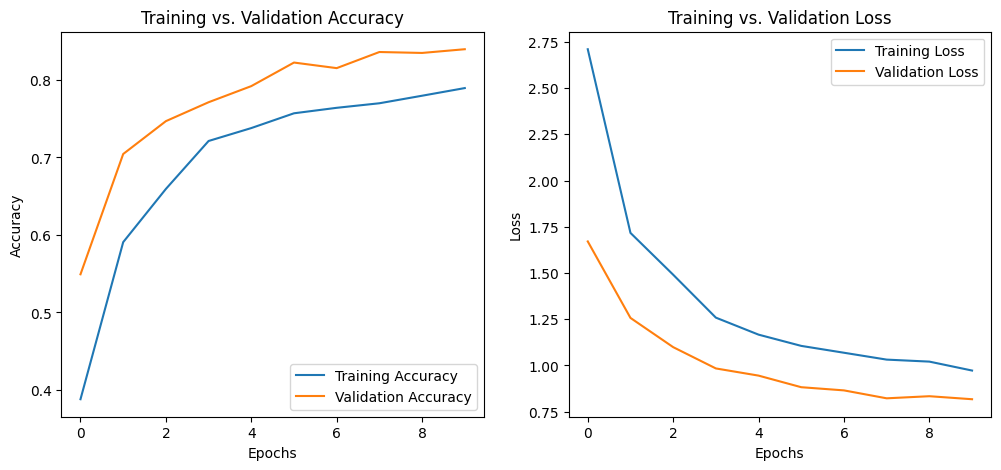

In [ ]:
###Training the model to predict Subcategories
from tensorflow.keras.regularizers import l2

value_counts_subcat = full_data['subCategory'].nunique()
labels_subcat = full_data['subCategory_encoded'].values

model3 = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.3),  # Increased dropout in the convolutional part
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),  # Added L2 regularization
    Dropout(0.6),  # Increased dropout rate
    Dense(value_counts_subcat, activation='softmax')  # Output layer for classification
])

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

x_train, x_test, y_train, y_test = train_test_split(resized_images, labels_subcat, test_size=0.25, random_state=42)
y_train_encoded = to_categorical(y_train, num_classes=value_counts_subcat)
y_test_encoded = to_categorical(y_test, num_classes=value_counts_subcat)

history = model3.fit(x_train, y_train_encoded, epochs = 10, batch_size = 32, validation_data=(x_test, y_test_encoded))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model4 = Sequential([
    # First convolutional layer
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),
    Dropout(0.3),

    # Second convolutional layer
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),
    Dropout(0.3),

    # Third convolutional layer
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),
    Dropout(0.4),

    # Fourth convolutional layer
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),
    Dropout(0.5),

    # Flattening the layers
    Flatten(),

    # Dense layers
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),

    # Output layer
    Dense(5, activation='softmax')
])

# Compile the model
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
history = model4.fit(x_train, y_train_encoded, epochs = 5, batch_size = 32, validation_data=(x_test, y_test_encoded) )


Epoch 1/10
24/24 [==============================] - 17s 695ms/step - loss: 0.0331 - accuracy: 0.9933 - val_loss: 1.7862 - val_accuracy: 0.7680
Epoch 2/10
24/24 [==============================] - 18s 742ms/step - loss: 0.0396 - accuracy: 0.9893 - val_loss: 1.9736 - val_accuracy: 0.7840
Epoch 3/10
24/24 [==============================] - 15s 620ms/step - loss: 0.0296 - accuracy: 0.9880 - val_loss: 1.9279 - val_accuracy: 0.7840
Epoch 4/10
24/24 [==============================] - 16s 658ms/step - loss: 0.0183 - accuracy: 0.9947 - val_loss: 2.0331 - val_accuracy: 0.7800
Epoch 5/10
24/24 [==============================] - 15s 622ms/step - loss: 0.0211 - accuracy: 0.9947 - val_loss: 1.8109 - val_accuracy: 0.7760
Epoch 6/10
24/24 [==============================] - 16s 658ms/step - loss: 0.0134 - accuracy: 0.9960 - val_loss: 2.0847 - val_accuracy: 0.7680
Epoch 7/10
24/24 [==============================] - 16s 660ms/step - loss: 0.0208 - accuracy: 0.9920 - val_loss: 2.4313 - val_accuracy: 0.7800

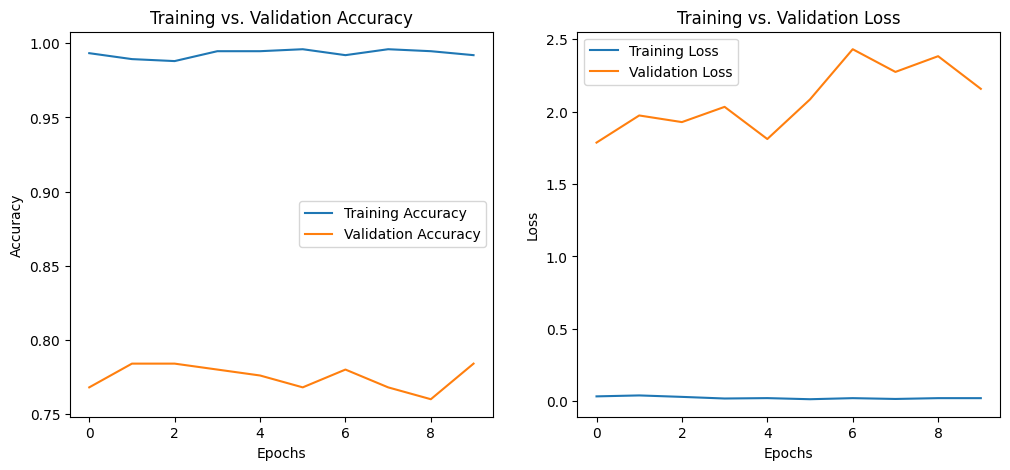

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


Epoch 1/10
235/235 [==============================] - 609s 3s/step - loss: 1.2327 - accuracy: 0.4737 - val_loss: 1.2108 - val_accuracy: 0.4740
Epoch 2/10
235/235 [==============================] - 641s 3s/step - loss: 1.2010 - accuracy: 0.4863 - val_loss: 1.2114 - val_accuracy: 0.4740
Epoch 3/10
235/235 [==============================] - 601s 3s/step - loss: 1.1868 - accuracy: 0.4867 - val_loss: 1.1357 - val_accuracy: 0.4868
Epoch 4/10
235/235 [==============================] - 634s 3s/step - loss: 1.1031 - accuracy: 0.4915 - val_loss: 1.0550 - val_accuracy: 0.4964
Epoch 5/10
235/235 [==============================] - 590s 3s/step - loss: 1.0137 - accuracy: 0.5407 - val_loss: 1.0264 - val_accuracy: 0.5176
Epoch 6/10
235/235 [==============================] - 573s 2s/step - loss: 0.9501 - accuracy: 0.5692 - val_loss: 0.9710 - val_accuracy: 0.5748
Epoch 7/10
235/235 [==============================] - 581s 2s/step - loss: 0.9105 - accuracy: 0.5843 - val_loss: 0.9115 - val_accuracy: 0.5980

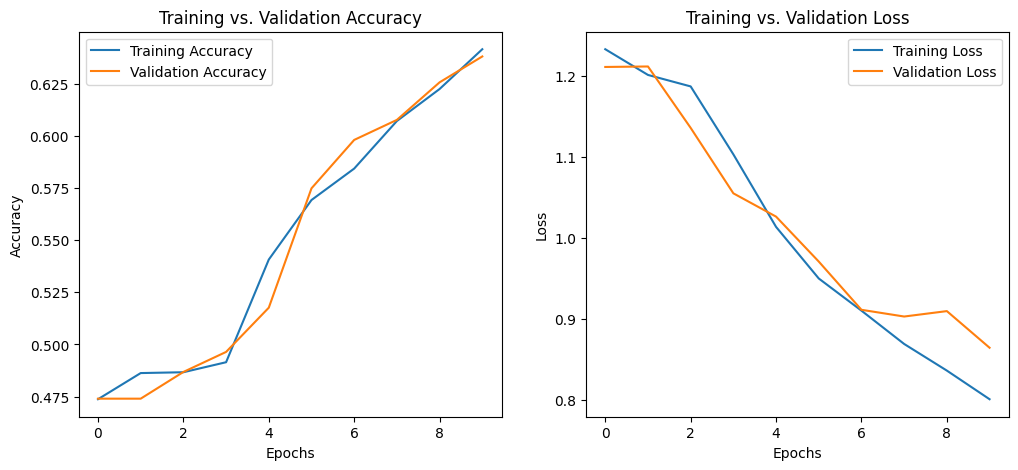

In [ ]:
###Training the model to predict seaons
value_counts_season = full_data['season_encoded'].nunique()
labels_season = full_data['season_encoded'].values

model5 = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.3),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(value_counts_season, activation='softmax')
])


model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

x_train, x_test, y_train, y_test = train_test_split(resized_images, labels_season, test_size=0.25, random_state=42)
y_train_encoded = to_categorical(y_train, num_classes=value_counts_season)
y_test_encoded = to_categorical(y_test, num_classes=value_counts_season)

history = model5.fit(x_train, y_train_encoded, epochs = 10, batch_size = 32, validation_data=(x_test, y_test_encoded))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


END
END
END
END Peoj
